In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import functions
from astropy.table import QTable
import astropy.units as u

In [3]:
df_zr=pd.read_csv('df_zr.csv')
df_zg=pd.read_csv('df_zg.csv')

In [19]:
functions.query(1108)

SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period,identifier,dist,type,Gaia_count,multiflag,GaiaDist,fluxratio,Gmag,RFG,Plx,e_Plx,Plxflag,RUWE,XMM,XMM_dist,Chandra,Chandra_dist,var,lc_var,var_flag,inside_flag,ic10_flag
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64,str37,float64,str15,int32,int32,float64,float64,float64,float64,float64,float64,int32,float64,int32,float64,int32,float64,str1,str1,bool,bool,bool
1108,zr,1809211300061682,5.0284559,59.3358193,76,183.6512908935547,6.6949833771127665,7.605275393790606e-21,0.09824171662330627,0.004758048733407057,382.40917435630683,2800.0,0.2850239365417144,0.9604888091611224,19.056245803833008,0.09824171662330627,18.381244659423828,19.273178100585938,-0.1481584906578064,2.5899946689605713,0.006761714293985778,0.005440618207977758,0.02670031068036363,0.0,0.329104302444827,0.024411534223504616,0.954792467406023,g1,DSCT,0.44,1.0,0.030255338316331138,--,nan,--,1,0,0.08909,0.0,19.117807,500.494,-0.4763,0.2164,0,0.985,0,nan,0,nan,V,V,False,True,True
1108,zr,806203100056766,5.0284296,59.3358461,798,145.76475524902344,3.166414257134709,8.713674384164206e-14,0.08519556373357773,0.01029846446908242,0.34547168708256726,0.997336033066433,0.05703096514048384,0.0025642691856170683,19.082008361816406,0.08519556373357773,18.453298568725586,19.34362030029297,-0.09416805952787399,1.7868210077285767,0.004363046598037131,0.0013372417314058836,0.06509106968951424,1.0,0.054036558231004506,0.00025739234259003485,0.9989786907511199,g1,NonVar,0.64,1.0,0.041232554136705415,--,nan,--,1,0,0.08909,0.0,19.117807,500.494,-0.4763,0.2164,0,0.985,0,nan,0,nan,V,V,False,True,True


SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period,identifier,dist,type,Gaia_count,multiflag,GaiaDist,fluxratio,Gmag,RFG,Plx,e_Plx,Plxflag,RUWE,XMM,XMM_dist,Chandra,Chandra_dist,var,lc_var,var_flag,inside_flag,ic10_flag
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64,str37,float64,str15,int32,int32,float64,float64,float64,float64,float64,float64,int32,float64,int32,float64,int32,float64,str1,str1,bool,bool,bool
1108,zg,1809111300042473,5.02847,59.3358247,44,29.739404678344727,2.841191726650081,0.03603264062996541,0.1884007304906845,0.021630393218084014,0.11727191471652812,2800.0,0.3889278911219688,0.04085731292100771,20.20391273498535,0.1884007304906845,19.642566680908203,20.558629989624023,-0.19300957024097443,1.7040300369262695,0.2431710569861169,0.10578661030984292,0.2877592351648935,0.0,0.10576788338335608,0.07669870497851239,0.5850414056624345,g1,DSCT,0.56,1.0,0.13290109401693112,--,nan,--,1,0,0.104281,0.0,19.117807,500.494,-0.4763,0.2164,0,0.985,0,nan,0,nan,V,N,False,True,True
1108,zg,806103100035958,5.0284803,59.3358285,261,60.019283294677734,3.04648340116845,9.066423339203671e-08,0.16363079845905304,0.0005239484630519521,0.25216133621213305,1.0000029353002315,0.11106406243918435,0.027678366409646705,20.242420196533203,0.16363079845905304,19.242055892944336,20.71121597290039,-0.15655624866485596,1.7693051099777222,0.02167192445790925,0.019779000218002215,0.028365076194812013,0.0,0.41010569862782575,0.2545976286032322,0.6342356684078561,g1,RRL_ab,0.86,1.0,0.5079634327299308,--,nan,--,1,0,0.104281,0.0,19.117807,500.494,-0.4763,0.2164,0,0.985,0,nan,0,nan,V,V,False,True,True


In [10]:
from astropy.table import QTable
import astropy.units as u

t_ztf=QTable.read('https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?ID=806203100056766')

#remove the bad one day
t_ztf=t_ztf[t_ztf['catflags']==0]

t_ztf=t_ztf[(t_ztf['mjd']<58481*u.day)|(t_ztf['mjd']>58482*u.day)]
t_ztf=t_ztf[(t_ztf['mjd']<58472*u.day)|(t_ztf['mjd']>58474*u.day)]
t_ztf=t_ztf[(t_ztf['mjd']<59032*u.day)|(t_ztf['mjd']>59033*u.day)]

# up to DR15, Nov 2022, MJD 59892
t_ztf=t_ztf[t_ztf['mjd']<59892*u.day]

In [11]:
t_ztf[t_ztf['mag'].value<18.75]

oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
,,d,d,mag,mag,,,deg,deg,,,,,,,mag,mag,mag,,,s,,
int64,int32,float64,float64,float32,float32,int32,object,float64,float64,float32,float32,int64,int32,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,int32
806203100056766,54840877,2458302.9073182736,58302.4087731,18.614028930664062,0.04037269949913025,0,zr,5.0288272,59.3361048,1.949,-0.042,20180703408750,806,3,1,20.209999084472656,26.170183181762695,0.02449771761894226,0.106493935,5.768653e-06,30.0,1.407,1
806203100056766,70315728,2458457.660396415,58457.1572801,18.453298568725586,0.036424409598112106,0,zr,5.0286602,59.3360547,0.4,0.085,20181205157257,806,3,1,19.690000534057617,26.291868209838867,0.01945783756673336,0.059558403,3.6991241e-06,30.0,1.134,1
806203100056766,102723740,2458781.7412176435,58781.2374074,18.463163375854492,0.0366513654589653,0,zr,5.0290898,59.3360835,0.746,-0.01,20191025237234,806,3,1,19.209999084472656,26.018644332885742,0.023686902597546577,0.092668556,5.3124063e-06,30.0,1.144,3
806203100056766,131846939,2459072.970342547,59072.4693981,18.598186492919922,0.03995903208851814,0,zr,5.0287988,59.3359612,1.784,-0.032,20200811469398,806,3,1,20.760000228881836,26.338397979736328,0.018664244562387466,0.08464466,4.1681465e-06,30.0,1.145,1


In [12]:
functions.query(128)

SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period,identifier,dist,type,Gaia_count,multiflag,GaiaDist,fluxratio,Gmag,RFG,Plx,e_Plx,Plxflag,XMM,XMM_dist,Chandra,Chandra_dist,var,lc_var,var_flag,inside_flag,ic10_flag
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64,str37,float64,str15,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float64,str1,str1,bool,bool,bool
128,zr,806203100051985,5.0802628,59.3150926,827,493.1247253417969,22.28174852955496,0.0,0.13863849639892578,0.00018956933229283818,365.196712888864,0.997336033066433,0.07470724952421111,0.5098066049501832,18.16891098022461,0.13863849639892578,17.472774505615234,18.79983139038086,-0.35995468497276306,4.759553909301758,0.021786847115272328,0.006299797262173097,0.02345751807865187,0.0,0.048277409509693836,0.04183023555934906,0.5375692987665113,g2,NonVar,0.75,1.0,0.03745451781352452,[BGR2000] Br 2,1.552502,SNR,1,0,0.225229,0.0,21.314371,38.3651,nan,nan,0,0,nan,0,nan,V,V,False,True,True
128,zr,1809211300076065,5.080435,59.3151386,77,361.19036865234375,17.331036691265922,1.1337936299363972e-93,0.12107055634260178,0.0024641887952215557,29.60907529731348,2800.0,0.29517355583794247,0.49695454337938844,18.190528869628906,0.12107055634260178,17.834491729736328,18.50570297241211,-0.30350762605667114,4.169249534606934,0.16130074083929058,0.05679803970848703,0.07516762291519417,1.0,0.07061249038465456,0.29426193153932334,0.1675914969466089,gu,NonVar,0.38,1.0,0.03754219703605329,[BGR2000] Br 2,1.552502,SNR,1,0,0.225229,0.0,21.314371,38.3651,nan,nan,0,0,nan,0,nan,V,V,False,True,True


SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period,identifier,dist,type,Gaia_count,multiflag,GaiaDist,fluxratio,Gmag,RFG,Plx,e_Plx,Plxflag,XMM,XMM_dist,Chandra,Chandra_dist,var,lc_var,var_flag,inside_flag,ic10_flag
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64,str37,float64,str15,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float64,str1,str1,bool,bool,bool
128,zg,806103100029733,5.0803404,59.3150712,326,199.4447021484375,10.174357666706207,3.689449660154022e-179,0.14220526814460754,2.415362491140026e-06,0.9946200219827421,1.0000143393856216,0.12090795839317756,0.06037667927701669,18.984163284301758,0.14220526814460754,18.285764694213867,19.250402450561523,-0.24554207921028137,3.2186222076416016,0.0473119415628532,0.0036995525811489944,0.13996626874387139,1.0,0.003687303327418623,0.0004255773656467454,0.9121326216398279,g1,CEPH_Other,0.38,1.0,0.9947116227631579,[BGR2000] Br 2,1.485283,SNR,1,0,0.099709,0.0,21.314371,38.3651,nan,nan,0,0,nan,0,nan,V,V,False,True,True
128,zg,1809111300047885,5.0803638,59.3150886,58,98.10738372802734,7.25096665629108,7.771966587623677e-19,0.15138696134090424,0.027271233033139594,0.10996880648263942,2800.0,0.30674870963395723,0.04858631256194091,19.010231018066406,0.15138696134090424,18.683761596679688,19.424171447753906,-0.260867178440094,2.7068915367126465,0.3683434262053793,0.47414568075174396,0.374943889773745,1.0,0.7139840368041125,0.6955581598070186,0.5090445983015485,g1,DSCT,0.79,1.0,0.0639789737457735,[BGR2000] Br 2,1.485283,SNR,1,0,0.099709,0.0,21.314371,38.3651,nan,nan,0,0,nan,0,nan,V,V,False,True,True


In [13]:
t_ztf=QTable.read('https://irsa.ipac.caltech.edu/cgi-bin/ZTF/nph_light_curves?ID=806203100051985')

#remove the bad one day
t_ztf=t_ztf[t_ztf['catflags']==0]

t_ztf=t_ztf[(t_ztf['mjd']<58481*u.day)|(t_ztf['mjd']>58482*u.day)]
t_ztf=t_ztf[(t_ztf['mjd']<58472*u.day)|(t_ztf['mjd']>58474*u.day)]
t_ztf=t_ztf[(t_ztf['mjd']<59032*u.day)|(t_ztf['mjd']>59033*u.day)]

# up to DR15, Nov 2022, MJD 59892
t_ztf=t_ztf[t_ztf['mjd']<59892*u.day]

In [14]:
t_ztf[t_ztf['mag'].value<17.6]

oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
,,d,d,mag,mag,,,deg,deg,,,,,,,mag,mag,mag,,,s,,
int64,int32,float64,float64,float32,float32,int32,object,float64,float64,float32,float32,int64,int32,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,int32
806203100051985,70315728,2458457.6603988805,58457.1572801,17.536243438720703,0.022028958424925804,0,zr,5.0799187,59.3149786,0.717,0.003,20181205157257,806,3,1,19.690000534057617,26.291868209838867,0.01945783756673336,0.059558403,3.6991241e-06,30.0,1.134,1
806203100051985,142624062,2459180.743998937,59180.240625,17.472774505615234,0.021407639607787132,0,zr,5.0800744,59.3152946,0.752,0.35,20201127240625,806,3,1,18.399999618530273,26.3316650390625,0.04676099494099617,0.09665335,2.2005926e-05,30.0,1.213,1
806203100051985,143224616,2459186.74934063,59186.246169,17.582021713256836,0.022500278428196907,0,zr,5.0799128,59.315196,1.252,-0.07,20201203246146,806,3,1,19.15999984741211,26.30592918395996,0.0249690730124712,0.10002809,6.04774e-06,30.0,1.258,1


In [5]:
len(np.unique(df_zr['SourceID']))

1516

In [6]:
len(np.unique(df_zr[(df_zr['var']=='V')&(df_zr['ic10_flag']==1)]['SourceID']))

101

In [7]:
len(np.unique(df_zg[(df_zg['var']=='V')&(df_zg['ic10_flag']==1)]['SourceID']))

48

In [8]:
len(np.unique(df_zr[(df_zr['var']=='P')&(df_zr['ic10_flag']==1)]['SourceID']))

22

In [9]:
len(np.unique(df_zg[(df_zg['var']=='P')&(df_zg['ic10_flag']==1)]['SourceID']))

4

In [10]:
len(np.unique(df_zr[(df_zr['var']=='V')&(df_zr['Chandra']==1)]['SourceID']))

2

In [11]:
len(np.unique(df_zr[(df_zr['var']=='P')&(df_zr['Chandra']==1)]['SourceID']))

6

In [12]:
len(np.unique(df_zr[(df_zr['var']=='P')&(df_zr['XMM']==1)]['SourceID']))

1

In [13]:
df_zr[(df_zr['var']=='P')&(df_zr['XMM']==1)]

,SourceID,filter,OID,RA,DEC,numobs,sf,FAP,period,period_w,...,RUWE,XMM,XMM_dist,Chandra,Chandra_dist,inside_flag,ic10_flag,lc_var,var,var_flag
2062,1843,zr,806203100023114,5.177809,59.314296,859,3.821162e-35,7.288464e-64,1128.314345,0.997336,...,0.968,1,1.205784,1,0.654229,False,False,P,P,False
2063,1843,zr,1809211300007269,5.177834,59.314287,77,9.759847e-07,7.646460e-09,793.470862,2800.000000,...,0.968,1,1.205784,1,0.654229,False,False,V,P,False


In [23]:
functions.query(439)

SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period,identifier,dist,type,Gaia_count,multiflag,GaiaDist,fluxratio,Gmag,RFG,Plx,e_Plx,Plxflag,XMM,XMM_dist,Chandra,Chandra_dist,var,lc_var,var_flag,inside_flag,ic10_flag
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64,str37,float64,str15,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float64,str1,str1,bool,bool,bool
439,zr,1809211300042148,5.0742247,59.3260104,68,24.0855770111084,1.4642729439121258,0.9511868759873303,0.11887487769126892,0.0004600938675696531,1.3914628119637142,2800.0,0.3612868249358036,0.011717249119181596,19.920970916748047,0.11887487769126892,19.683393478393555,20.19719696044922,-0.10407295823097229,1.2145365476608276,0.3015237875436522,0.2939809865129014,0.44909048586525974,0.0,0.45898348422516155,0.22692124166173633,0.6939116401576699,g1,CEPH_F,0.31,1.0,1.3909859943336642,--,nan,--,1,0,0.107553,0.0,19.61618,205.613,0.463,0.3023,1,0,nan,0,nan,P,N,False,True,False
439,zr,806203100043284,5.0741825,59.3260349,662,42.31599426269531,3.4373748469641683,8.763464508600559e-17,0.2168726772069931,6.84641750548418e-23,238.04133729120863,0.997343815080248,0.270724498758034,0.0669710949966615,20.104284286499023,0.2168726772069931,19.3428955078125,20.985332489013672,-0.26043152809143066,1.9058979749679565,0.008169558383902745,0.0012830310537330653,0.009699418886023034,0.0,0.014641262838516855,0.010439056165814531,0.5866762443357652,g2,EB_ED,0.62,1.0,1.0006102484084891,--,nan,--,1,0,0.107553,0.0,19.61618,205.613,0.463,0.3023,1,0,nan,0,nan,P,P,False,True,False


SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period,identifier,dist,type,Gaia_count,multiflag,GaiaDist,fluxratio,Gmag,RFG,Plx,e_Plx,Plxflag,XMM,XMM_dist,Chandra,Chandra_dist,var,lc_var,var_flag,inside_flag,ic10_flag
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64,str37,float64,str15,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float64,str1,str1,bool,bool,bool


PearsonRResult(statistic=0.4385999039110156, pvalue=1.1732733180593953e-12)


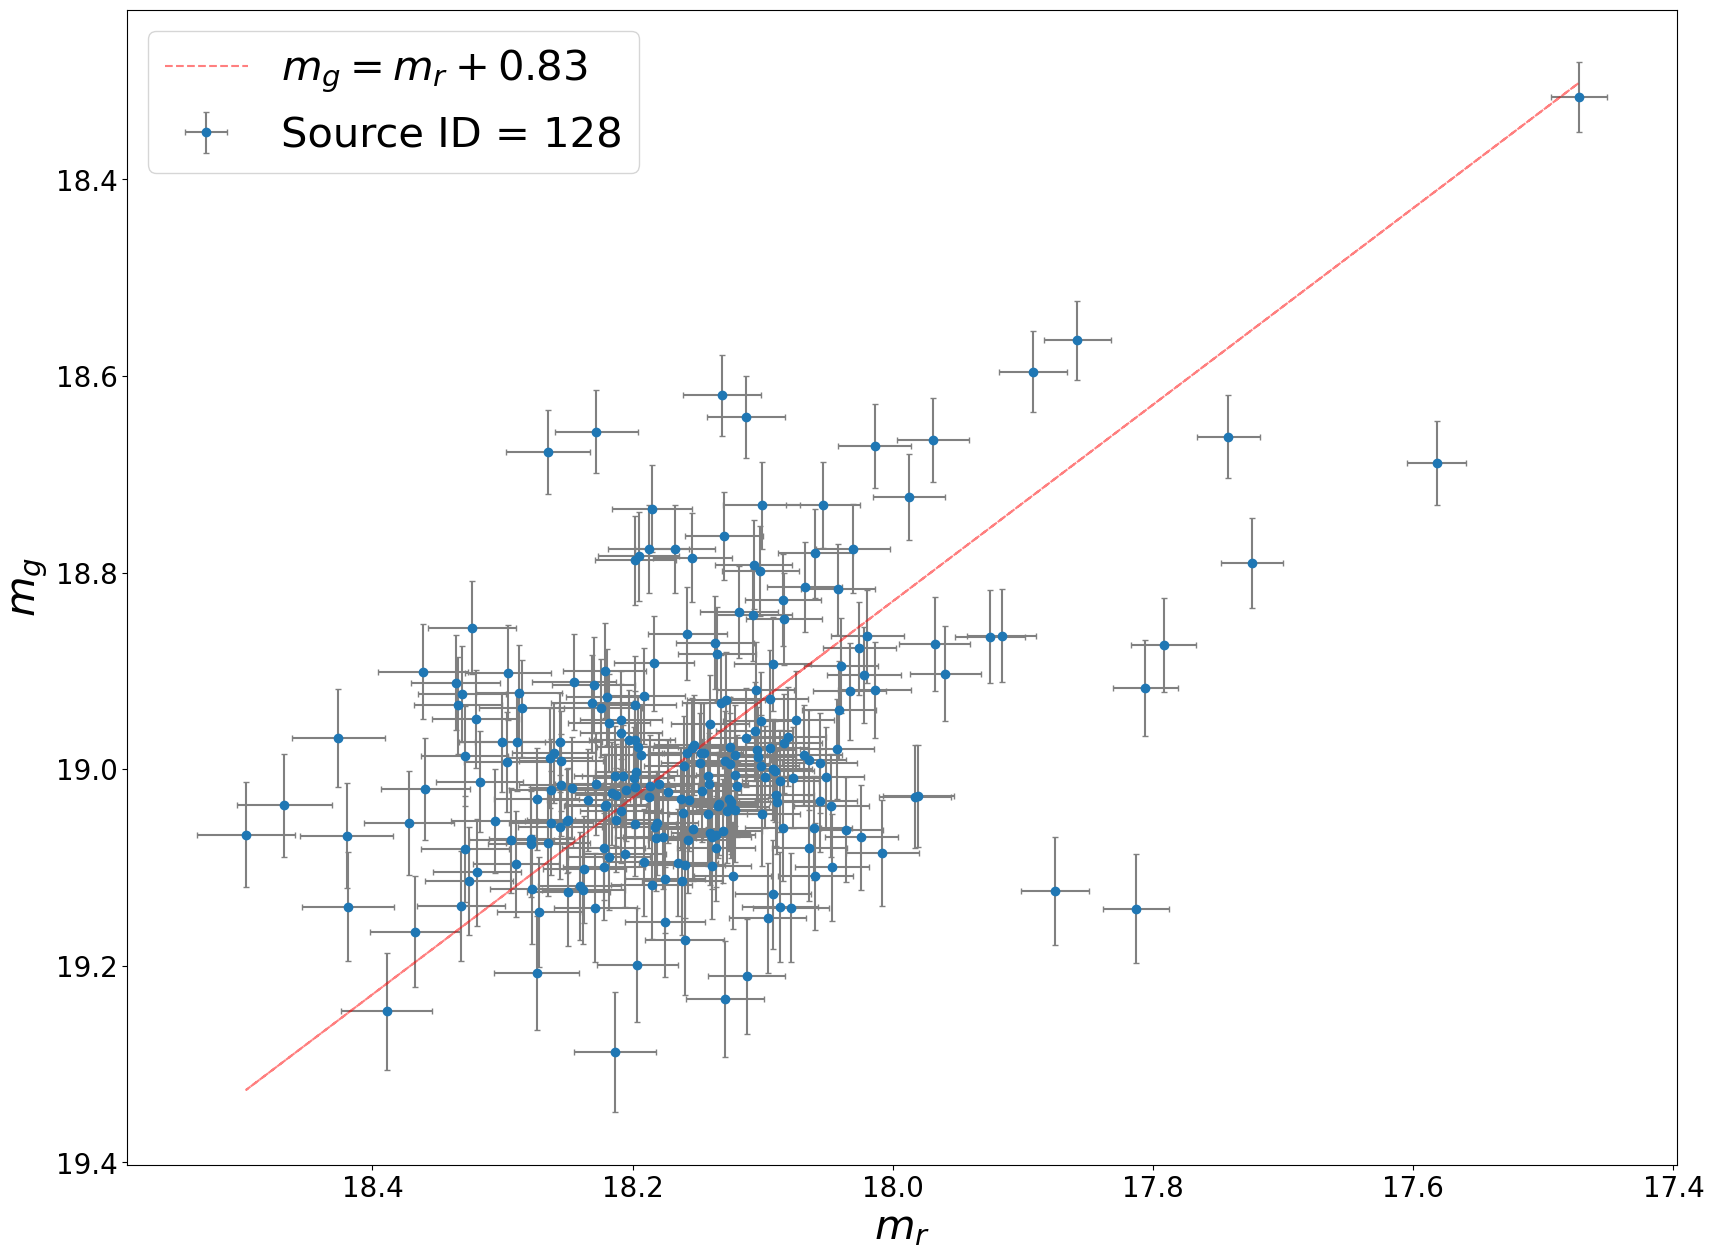

In [24]:
functions.color3(128,corr=True)

PearsonRResult(statistic=0.08183981423306655, pvalue=0.2578579966229055)


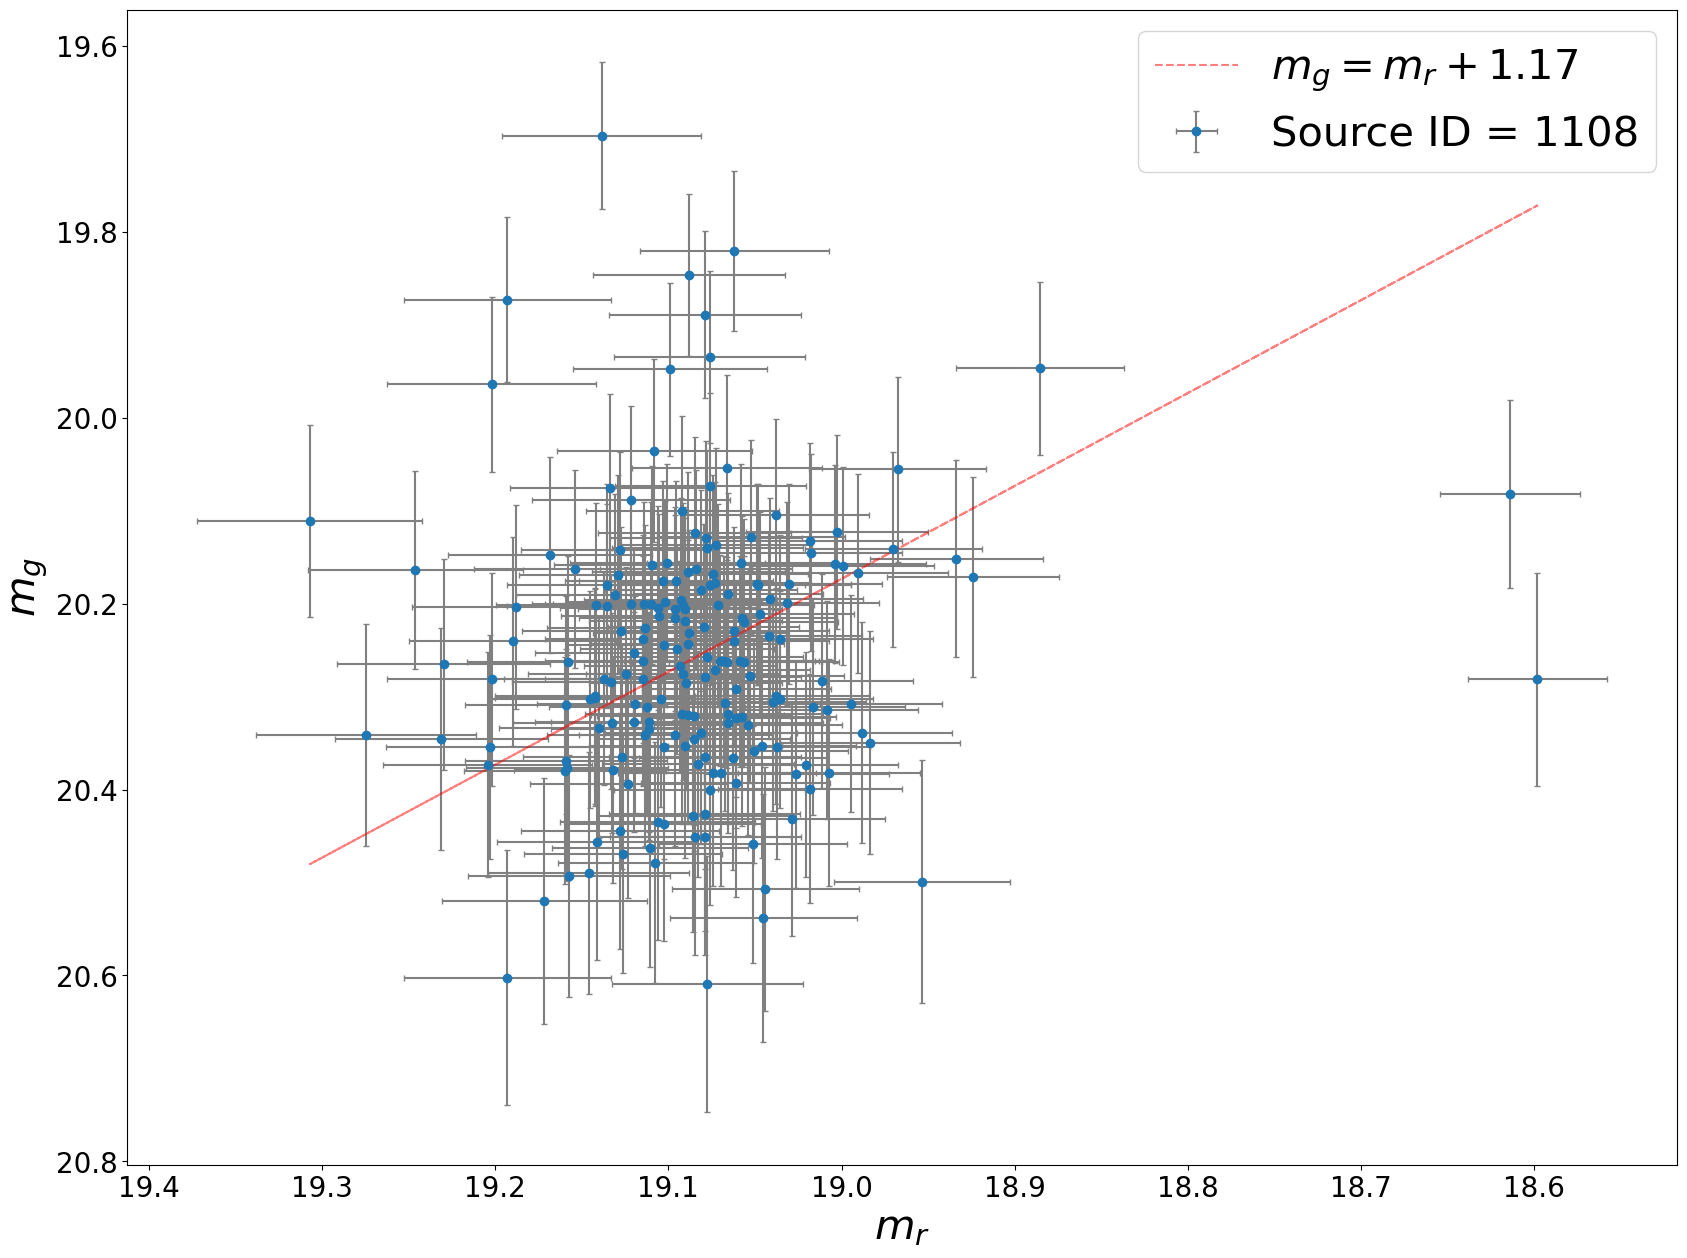

In [25]:
functions.color3(1108,corr=True)

In [26]:
functions.query(439)

SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period,identifier,dist,type,Gaia_count,multiflag,GaiaDist,fluxratio,Gmag,RFG,Plx,e_Plx,Plxflag,XMM,XMM_dist,Chandra,Chandra_dist,var,lc_var,var_flag,inside_flag,ic10_flag
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64,str37,float64,str15,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float64,str1,str1,bool,bool,bool
439,zr,1809211300042148,5.0742247,59.3260104,68,24.0855770111084,1.4642729439121258,0.9511868759873303,0.11887487769126892,0.0004600938675696531,1.3914628119637142,2800.0,0.3612868249358036,0.011717249119181596,19.920970916748047,0.11887487769126892,19.683393478393555,20.19719696044922,-0.10407295823097229,1.2145365476608276,0.3015237875436522,0.2939809865129014,0.44909048586525974,0.0,0.45898348422516155,0.22692124166173633,0.6939116401576699,g1,CEPH_F,0.31,1.0,1.3909859943336642,--,nan,--,1,0,0.107553,0.0,19.61618,205.613,0.463,0.3023,1,0,nan,0,nan,P,N,False,True,False
439,zr,806203100043284,5.0741825,59.3260349,662,42.31599426269531,3.4373748469641683,8.763464508600559e-17,0.2168726772069931,6.84641750548418e-23,238.04133729120863,0.997343815080248,0.270724498758034,0.0669710949966615,20.104284286499023,0.2168726772069931,19.3428955078125,20.985332489013672,-0.26043152809143066,1.9058979749679565,0.008169558383902745,0.0012830310537330653,0.009699418886023034,0.0,0.014641262838516855,0.010439056165814531,0.5866762443357652,g2,EB_ED,0.62,1.0,1.0006102484084891,--,nan,--,1,0,0.107553,0.0,19.61618,205.613,0.463,0.3023,1,0,nan,0,nan,P,P,False,True,False


SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period,identifier,dist,type,Gaia_count,multiflag,GaiaDist,fluxratio,Gmag,RFG,Plx,e_Plx,Plxflag,XMM,XMM_dist,Chandra,Chandra_dist,var,lc_var,var_flag,inside_flag,ic10_flag
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64,str37,float64,str15,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float64,str1,str1,bool,bool,bool


In [4]:
SourceID=[85, 184, 188, 255, 492, 25, 
          62, 64, 65, 128, 222, 226, 247,
269, 293, 327, 331, 375, 487,
520, 570, 574, 639, 883, 1053, 1108]

corrs=[]

for i in SourceID:
    corr=functions.zrzg_corr(i)
    print(i,corr)
    corrs.append(corr[0])

85 PearsonRResult(statistic=0.2881769908109077, pvalue=5.685920261197699e-06)
184 PearsonRResult(statistic=0.12803478757337708, pvalue=0.05514589080996379)
188 PearsonRResult(statistic=0.12349870046514946, pvalue=0.2382421969552758)
255 PearsonRResult(statistic=0.2731879141636631, pvalue=3.262951690294433e-05)
492 PearsonRResult(statistic=0.02578841531736767, pvalue=0.7333156233800926)
25 PearsonRResult(statistic=0.4450922664943854, pvalue=5.825839818990905e-09)
62 PearsonRResult(statistic=0.12177929700401027, pvalue=0.0890671329738675)
64 PearsonRResult(statistic=0.17924727241387609, pvalue=0.009581503270654886)
65 PearsonRResult(statistic=0.16859470139424504, pvalue=0.009162272849496516)
128 PearsonRResult(statistic=0.4385999039110156, pvalue=1.1732733180593953e-12)
222 PearsonRResult(statistic=0.07352179669883024, pvalue=0.3494772637777475)
226 PearsonRResult(statistic=0.26927969965038867, pvalue=6.872409504379608e-05)
247 PearsonRResult(statistic=0.1164201798728873, pvalue=0.078073

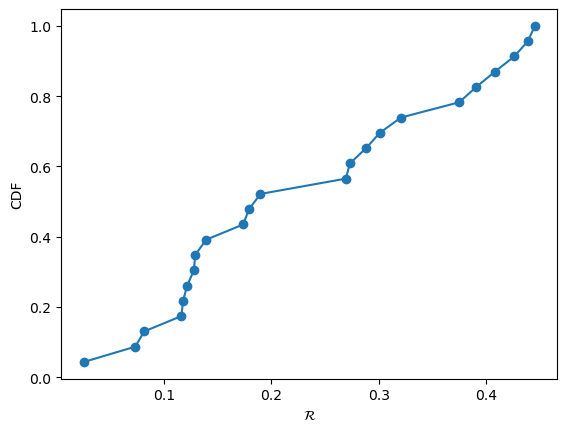

In [44]:
# plot the CDF of the correlation coefficients
#hist=plt.hist(corrs,bins=len(corrs),cumulative=True,density=True,histtype='step')
plt.plot(sorted(corrs),np.linspace(0,1,len(corrs)+1)[1:],'o-')
plt.xlabel(r'$\mathcal{R}$')
plt.ylabel('CDF')
plt.show()

In [10]:
t_plot[np.isin(t_plot['SourceID'],SourceID)]

,SourceID,mean_color,std_color,max_color,min_color,mean_mag_r,std_mag_r,max_mag_r,min_mag_r,mean_mag_g,...,min_mag_g,var,Plxflag,ic10_flag,type,XMM,Chandra,intrinsic_mag_r,intrinsic_color,absolute_mag_r
8,25,0.581245,0.192227,1.105619,0.093187,19.457846,0.210506,19.978657,17.984739,20.036285,...,18.759005,V,0.0,True,0,0.0,0.0,16.924154,-0.500283,-7.075846
22,62,1.253725,0.176481,1.613756,0.602432,18.865921,0.080599,19.125641,18.525873,20.116045,...,19.540489,V,0.0,True,0,0.0,0.0,16.332229,0.172197,-7.667771
23,64,0.681666,0.097850,1.015993,0.302935,18.635386,0.073272,18.849237,18.284832,19.313620,...,18.971237,V,0.0,True,Cl*,0.0,0.0,16.101694,-0.399862,-7.898306
24,65,1.195302,0.064294,1.384840,0.923595,17.287558,0.037928,17.391010,17.128036,18.483706,...,18.136560,V,0.0,True,Cl*,0.0,0.0,14.753866,0.113774,-9.246134
32,85,0.772303,0.129152,1.106230,0.168232,18.225956,0.090332,18.633097,17.847694,19.000563,...,18.165077,V,0.0,True,Em*,0.0,0.0,15.692264,-0.309225,-8.307736
56,128,0.830349,0.141010,1.328924,0.411816,18.168911,0.138638,18.799831,17.472775,18.984163,...,18.285765,V,0.0,True,SNR,0.0,0.0,15.635219,-0.251179,-8.364781
76,184,0.940140,0.123031,1.484276,0.514853,18.584249,0.069153,18.792484,18.270721,19.525270,...,19.186539,V,0.0,True,Em*,0.0,0.0,16.050557,-0.141388,-7.949443
77,188,1.295453,0.249546,1.712513,0.668777,19.275085,0.161060,19.784031,18.590719,20.576635,...,19.653786,V,0.0,True,Em*,0.0,0.0,16.741393,0.213925,-7.258607
89,222,0.924029,0.217116,1.587721,0.122980,19.711594,0.144300,20.106501,19.224257,20.638844,...,19.926411,V,0.0,True,0,0.0,0.0,17.177902,-0.157499,-6.822098
93,226,1.089378,0.127513,1.406233,0.682873,18.774096,0.094107,19.003777,18.335798,19.869019,...,19.080233,V,0.0,True,Cl*,0.0,0.0,16.240404,0.007850,-7.759596


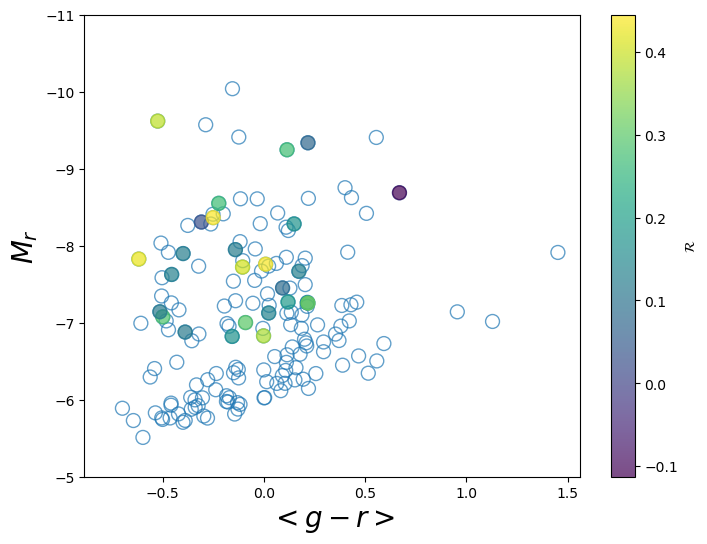

In [14]:
df_color=pd.read_csv('df_color.csv')

plt.figure(figsize=(8,6))
t_plot=df_color[df_color['ic10_flag']==1]

plt.scatter(t_plot['intrinsic_color'],t_plot['absolute_mag_r'],
            facecolors='none',
            edgecolors='C0',
            marker='o',
            s=100,alpha=0.7)

t_var=t_plot[np.isin(t_plot['SourceID'],SourceID)]
plt.scatter(t_var['intrinsic_color'],t_var['absolute_mag_r'],
            c=corrs,
            marker='o',
            s=100,alpha=0.7)

plt.xlabel('$<g - r>$',fontsize=20)
plt.ylabel('$M_r$',fontsize=20)
plt.colorbar(label=r'$\mathcal{R}$')

# Create a custom legend with two columns
plt.ylim(-11,-5)

plt.gca().invert_yaxis()

In [41]:
def sourcefy(t):
    mask=np.zeros(len(t))+1
    for i,row in enumerate(t):
        copy=t[t['SourceID']==row['SourceID']]
        if len(copy)>1:
            if row['OID']!=copy['OID'][copy['numobs'].argmax()]:
                mask[i]=0
    t=t[mask==1]
    return t

In [3]:
t_zr=QTable.read('t_zr_20240401.ecsv')
t_zg=QTable.read('t_zg_20240401.ecsv')

NameError: name 'QTable' is not defined

In [43]:
sourcefy(t_zr[(t_zr['var']=='P')&(t_zr['XMM']==1)])

SourceID,filter,OID,RA,DEC,numobs,DELTA_SIG_MAG,CONST_CHI2,sf,rmse,LNP_SIG,period,period_c,power,power_c,mean,std,min,max,sigma_mean,sigma_std,gaussian1_err,gaussian2_err,gumbel_err,g2_flag,Pg1g2,Pgug2,Pg1gu,shape,upsilon_class,upsilon_prob,upsilon_flag,upsilon_period,identifier,dist,type,Gaia_count,multiflag,GaiaDist,fluxratio,Gmag,RFG,Plx,e_Plx,Plxflag,XMM,XMM_dist,Chandra,Chandra_dist,var,lc_var,var_flag,inside_flag,ic10_flag
int32,str2,str16,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,str14,float64,float64,float64,str37,float64,str15,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,float64,int32,float64,str1,str1,bool,bool,bool
1843,zr,806203100023114,5.1778086,59.3142963,859,240.10179138183594,4.1348284114395,3.8211621356021924e-35,0.0430571623146534,7.28846422679995e-64,1128.3143454295916,0.997336033066433,0.504813527059251,0.09219368211855113,17.39191436767578,0.0430571623146534,17.285358428955078,17.502267837524414,-0.03789094090461731,2.0321946144104004,0.9850289689360678,0.2137336500317433,1.0174536386504924,0.0,0.02760473169739952,0.02591067058373786,0.5164896723193969,g2,EB_ESD,0.39,1.0,0.997954819075909,--,nan,--,1,0,0.054858,0.0,17.4216,585.511,1.0713,0.072,1,1,1.205784,1,0.654229,P,P,False,False,False


In [48]:
sourcefy(t_zr[(t_zr['var']=='P')&(t_zr['Chandra']==1)])[['SourceID','period','Chandra','XMM']]

SourceID,period,Chandra,XMM
int32,float64,int32,int32
77,26.55255504914417,1,0
158,590.2467822260307,1,0
1299,3.4010475333652077,1,0
1744,1608.4660693605288,1,0
1843,1128.3143454295916,1,1
2008,21.617133413881977,1,0


In [52]:
df_test=df_zr[df_zr['Plx']>0]

In [53]:
len(df_test[(df_test['Plx']/df_test['e_Plx'])>1])

812

In [54]:
len(df_test[(df_test['Plx']/df_test['e_Plx'])>3]) 

392

Text(0, 0.5, 'CDF')

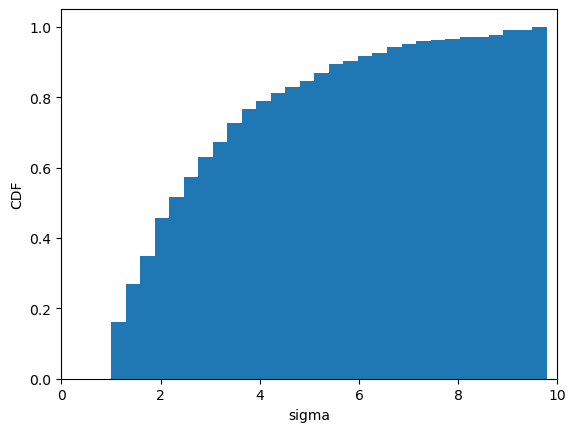

In [70]:
SNR=df_test['Plx']/df_test['e_Plx']
SNR=SNR[(SNR>=1)&(SNR<10)]
plt.hist(SNR,cumulative=True,density=True,bins=30)
plt.xlim(0,10)
plt.xlabel('sigma')
plt.ylabel('CDF')

In [4]:
gaia_zr=QTable.read('ztf_gaia_zr.csv')
gaia_zg=QTable.read('ztf_gaia_zg.csv')

t_zr=QTable.read('t_zr_20240401.ecsv')
t_zg=QTable.read('t_zg_20240401.ecsv')

In [5]:
t_zr.add_column(0.0,name='RUWE',index=45)
t_zg.add_column(0.0,name='RUWE',index=45)

In [6]:

for i,row in enumerate(t_zr):
    common=gaia_zr[gaia_zr['SourceID']==row['SourceID']]
    row['Gaia_count']=len(common)
    if len(common)!=0:
        #match=common[common['angDist'].argmin()]
        match=common[common['Gmag'].argmin()]
        try:
            row['RUWE']=match['RUWE']
        except:
            row['RUWE']=np.nan
        if (match['Plx']>0) and (np.abs(match['Plx']/match['e_Plx'])>1) and match['RUWE']<1.4:
            row['Plxflag']=1
        else:
            row['Plxflag']=0

        if row['Plxflag']==0 and row['inside_flag']==1:
            row['ic10_flag']=1
        else:
            row['ic10_flag']=0

for i,row in enumerate(t_zg):
    common=gaia_zg[gaia_zg['SourceID']==row['SourceID']]
    row['Gaia_count']=len(common)
    if len(common)!=0:
        #match=common[common['angDist'].argmin()]
        match=common[common['Gmag'].argmin()]
        try:
            row['RUWE']=match['RUWE']
        except:
            row['RUWE']=np.nan
        if (match['Plx']>0) and (np.abs(match['Plx']/match['e_Plx'])>1) and match['RUWE']<1.4:
            row['Plxflag']=1
        else:
            row['Plxflag']=0

        if row['Plxflag']==0 and row['inside_flag']==1:
            row['ic10_flag']=1
        else:
            row['ic10_flag']=0

c:\Users\zj448\AppData\Local\anaconda3\Lib\site-packages\astropy\table\column.py:1376: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value


In [7]:
t_zr.write('t_zr_20250225.ecsv',overwrite=True)
t_zg.write('t_zg_20250225.ecsv',overwrite=True)

In [8]:
# convert to pandas dataframe
df_zr=t_zr.to_pandas()
df_zg=t_zg.to_pandas()

# rename columns
df_zr.rename(columns={'LNP_SIG':'FAP',
                      'period_c':'period_w',
                      'power_c':'power_w'},inplace=True)
df_zg.rename(columns={'LNP_SIG':'FAP',
                      'period_c':'period_w',
                      'power_c':'power_w'},inplace=True)

columns=['SourceID', 'filter', 'OID', 'RA', 'DEC', 'numobs', 'sf', 'FAP', 
         'period', 'period_w', 'power', 'power_w', 'mean', 'std', 'min', 'max',
         'upsilon_class', 'upsilon_prob', 'upsilon_flag', 'upsilon_period',
         'identifier', 'dist', 'type', 'Gaia_count', 'multiflag', 'GaiaDist', 'fluxratio', 'Gmag',
         'Plx', 'e_Plx', 'Plxflag', 'RUWE', 'XMM', 'XMM_dist', 'Chandra', 'Chandra_dist',
         'inside_flag', 'ic10_flag','lc_var', 'var', 'var_flag']

df_zr=df_zr[columns]
df_zg=df_zg[columns]

df_zr.to_csv('df_zr.csv',index=False)
df_zg.to_csv('df_zg.csv',index=False)